# Feature selection method

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df=pd.read_csv(r"C:\Users\Sarvadnya\FUSIONCLASS\machine_learning\Boston.csv")
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


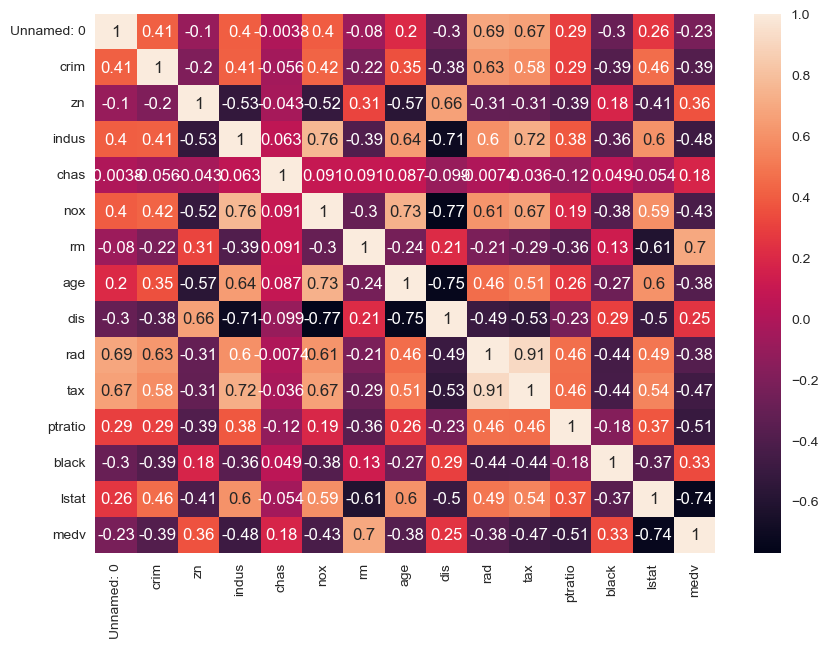

In [35]:
plt.rcParams['figure.figsize']=(10,7)
sns.heatmap(df.corr(),annot=True)
plt.show()

In [36]:
correlation =df.corr()['medv']
correlation

Unnamed: 0   -0.226604
crim         -0.388305
zn            0.360445
indus        -0.483725
chas          0.175260
nox          -0.427321
rm            0.695360
age          -0.376955
dis           0.249929
rad          -0.381626
tax          -0.468536
ptratio      -0.507787
black         0.333461
lstat        -0.737663
medv          1.000000
Name: medv, dtype: float64

In [37]:
correlation[correlation>=0.5]

rm      0.69536
medv    1.00000
Name: medv, dtype: float64

In [38]:
x=correlation[abs(correlation)>=0.4].index.tolist()
x

['indus', 'nox', 'rm', 'tax', 'ptratio', 'lstat', 'medv']

In [39]:
x=df[x]
x

,indus,nox,rm,tax,ptratio,lstat,medv
0,2.31,0.538,6.575,296,15.3,4.98,24.0
1,7.07,0.469,6.421,242,17.8,9.14,21.6
2,7.07,0.469,7.185,242,17.8,4.03,34.7
3,2.18,0.458,6.998,222,18.7,2.94,33.4
4,2.18,0.458,7.147,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...
501,11.93,0.573,6.593,273,21.0,9.67,22.4
502,11.93,0.573,6.120,273,21.0,9.08,20.6
503,11.93,0.573,6.976,273,21.0,5.64,23.9
504,11.93,0.573,6.794,273,21.0,6.48,22.0


In [40]:
y=df['medv']


In [41]:
#  next step would be using these selected column and create any regressin model

In [42]:
# Rfe

In [44]:
x=df.iloc[:,:-1]
y=df['medv']

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

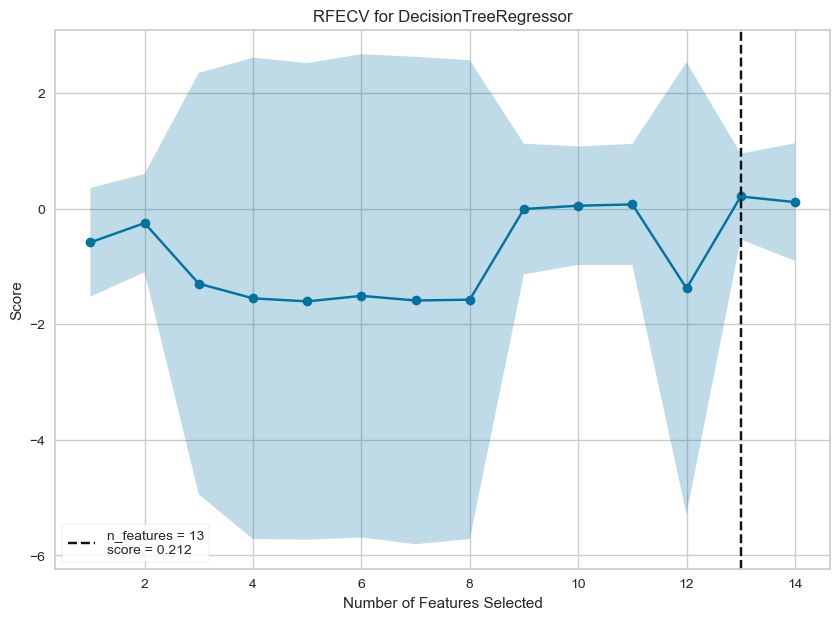

In [61]:
rfe=rfecv(DecisionTreeRegressor(random_state=1),x,y)

In [47]:
rfe.ranking_

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [50]:
dtr=DecisionTreeRegressor(random_state=1)
dtr.fit(x,y)
dtr.feature_importances_ # information gain

array([0.02255367, 0.05996719, 0.00078092, 0.00452531, 0.00082846,
       0.02552712, 0.57436006, 0.01005857, 0.07148428, 0.00122282,
       0.01120101, 0.00597871, 0.00528068, 0.20623121])

In [56]:
igr=pd.DataFrame()
igr['Features']=x.columns
igr['Information Gain']=dtr.feature_importances_
igr.sort_values(by='Information Gain',ascending=False)

,Features,Information Gain
6,rm,0.574360
13,lstat,0.206231
8,dis,0.071484
1,crim,0.059967
5,nox,0.025527
0,Unnamed: 0,0.022554
10,tax,0.011201
7,age,0.010059
11,ptratio,0.005979
12,black,0.005281


# RFE (recursive feature elimination)

In [19]:
#rfe all independent columns create a model

In [9]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt 
from yellowbrick.model_selection import rfecv
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [11]:
df = pd.read_csv(r"C:\Users\Sarvadnya\FUSIONCLASS\machine_learning\fetal_health.csv")
df 

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [12]:
x=df.iloc[:,:-1]
y=df['fetal_health']

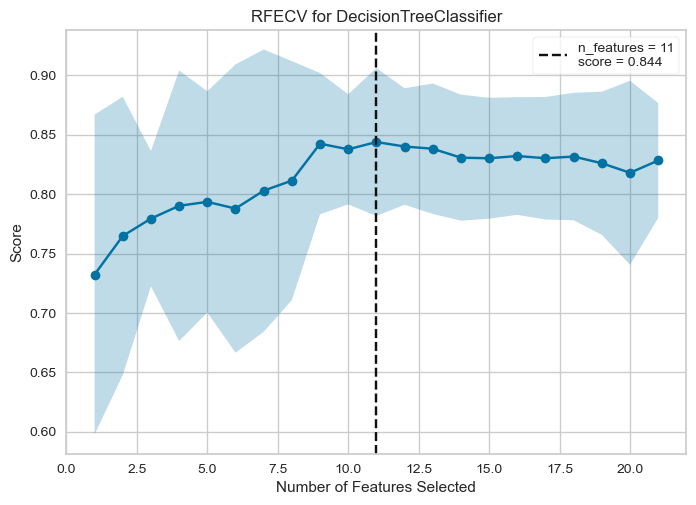

In [13]:
rfe=rfecv(DecisionTreeClassifier(random_state=1),x,y)

In [14]:
x.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'],
      dtype='object')

In [19]:
rfe.ranking_

array([ 1,  1,  6,  1, 10, 11,  3,  1,  1,  1,  1,  2,  4,  1,  1,  9,  1,
        1,  8,  5,  7])

In [16]:
rfe_cols=pd.DataFrame()
rfe_cols

""


In [22]:
rfe_cols['features']=x.columns
rfe_cols['rank']=rfe.ranking_

In [23]:
rfe_cols

,features,rank
0,baseline value,1
1,accelerations,1
2,fetal_movement,6
3,uterine_contractions,1
4,light_decelerations,10
5,severe_decelerations,11
6,prolongued_decelerations,3
7,abnormal_short_term_variability,1
8,mean_value_of_short_term_variability,1
9,percentage_of_time_with_abnormal_long_term_var...,1


# Embedded methods

In [24]:
x

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0


In [25]:
y

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2126, dtype: float64

In [27]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=1)
dt.fit(x,y)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [29]:
dt.feature_importances_ # information gain

array([0.04693222, 0.04262624, 0.01731558, 0.02969566, 0.0085418 ,
       0.        , 0.03670803, 0.29232143, 0.01741657, 0.18417974,
       0.01142961, 0.0175103 , 0.01145342, 0.01650235, 0.02486889,
       0.        , 0.01613284, 0.14939554, 0.049367  , 0.02213688,
       0.00546589])

In [30]:
x.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'],
      dtype='object')

In [31]:
ig=pd.DataFrame()
ig['Features']=x.columns
ig['Information Gain']=dt.feature_importances_
ig.sort_values(by='Information Gain',ascending=False)

,Features,Information Gain
7,abnormal_short_term_variability,0.292321
9,percentage_of_time_with_abnormal_long_term_var...,0.184180
17,histogram_mean,0.149396
18,histogram_median,0.049367
0,baseline value,0.046932
1,accelerations,0.042626
6,prolongued_decelerations,0.036708
3,uterine_contractions,0.029696
14,histogram_number_of_peaks,0.024869
19,histogram_variance,0.022137
